In [127]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lendo arquivo csv e armazenando-o a variável dados
dados = pd.read_csv('datasets\campeonato-brasileiro-full.csv')

In [2]:
# Exibindo o dataset
display(dados)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG
8401,8402,38,06/12/2023,21:32,Cuiaba,Athletico-PR,5-3-2,3-4-3,A. Cardoso de Oliveira,W. Carvalho,Cuiaba,Arena Pantanal,3,0,MT,PR
8402,8403,38,06/12/2023,21:32,Santos,Fortaleza,3-4-1-2,4-2-3-1,M. Fernandes,J. Vojvoda,Fortaleza,Estádio Urbano Caldeira,1,2,SP,CE
8403,8404,38,06/12/2023,21:32,Sao Paulo,Flamengo,4-2-3-1,4-2-3-1,D. Silvestre Júnior,A. Bacchi,Sao Paulo,Morumbi,1,0,SP,RJ


**EDITANDO O DATASET**

In [3]:
# Percebemos que a coluna rodata está escrita de forma errada. Vamos renomeá-la para rodada
dados.rename(columns={'rodata': 'rodada'}, inplace=True)

# Também vamos renomear algumas outras colunas
dados.rename(columns={'mandante_Placar': 'mandante_placar'}, inplace=True)
dados.rename(columns={'visitante_Placar': 'visitante_placar'}, inplace=True)
dados.rename(columns={'mandante_Estado': 'mandante_estado'}, inplace=True)
dados.rename(columns={'visitante_Estado': 'visitante_estado'}, inplace=True)

# Da mesma forma, vamos excluir a coluna ID pois não será necessária, visto que já temos os índices do dataframe
del dados['ID']

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rodada              8405 non-null   int64 
 1   data                8405 non-null   object
 2   hora                8405 non-null   object
 3   mandante            8405 non-null   object
 4   visitante           8405 non-null   object
 5   formacao_mandante   3431 non-null   object
 6   formacao_visitante  3431 non-null   object
 7   tecnico_mandante    3795 non-null   object
 8   tecnico_visitante   3795 non-null   object
 9   vencedor            8405 non-null   object
 10  arena               8405 non-null   object
 11  mandante_placar     8405 non-null   int64 
 12  visitante_placar    8405 non-null   int64 
 13  mandante_estado     8405 non-null   object
 14  visitante_estado    8405 non-null   object
dtypes: int64(3), object(12)
memory usage: 985.1+ KB


In [5]:
# Convertendo coluna data para datetime
dados['data'] = pd.to_datetime(dados['data'], dayfirst=True) 

In [6]:
# Criando nova coluna no dataframe para armazenar o dia da semana em que a partida foi realizada
dados.insert(2, 'dia da semana', dados['data'].dt.dayofweek)

# Mapeando os números para os nomes dos dias da semana
dados['dia da semana'] = dados['dia da semana'].map({0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'})

In [7]:
# Alterando para 'Empate' os valores '-' na coluna vencedor
dados['vencedor'] = dados['vencedor'].replace('-', 'Empate')

In [8]:
# Definindo função que retorna o perdedor da partida
def retornar_perdedor(mandante, visitante, vencedor):
    if vencedor == mandante:
        return visitante
    elif vencedor == visitante:
        return mandante
    else:
        return 'Empate'
    
perdedores = []
# Criando coluna perdedor
for linha in range(dados.shape[0]):
    perdedores.append(retornar_perdedor(dados['mandante'][linha], dados['visitante'][linha], dados['vencedor'][linha]))
    
dados.insert(11, 'perdedor', perdedores)

In [9]:
# Inserindo coluna que armazena a qual edição do campeonato pertence o jogo
dados.insert(17, 'edição', dados['data'].dt.year)

# Tratando casos dos jogos da edição de 2020 que foram realizados em 2021 devido a pandemia
condicao = (dados['data'].dt.year == 2021) & (dados['data'].dt.month <=2)
dados.loc[condicao, 'edição'] = 2020

In [10]:
# Visualizando como ficou o dataframe
display(dados)

,rodada,data,dia da semana,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,perdedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,edição
0,1,2003-03-29,Sábado,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Vasco,Brinco de Ouro,4,2,SP,RJ,2003
1,1,2003-03-29,Sábado,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Gremio,Arena da Baixada,2,0,PR,RS,2003
2,1,2003-03-30,Domingo,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,Empate,Empate,Maracanã,1,1,RJ,PR,2003
3,1,2003-03-30,Domingo,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,Empate,Empate,Serra Dourada,2,2,GO,PA,2003
4,1,2003-03-30,Domingo,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,Empate,Empate,Beira Rio,1,1,RS,SP,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,38,2023-12-06,Quarta-feira,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Atletico-MG,Itaipava Arena Fonte Nova,4,1,BA,MG,2023
8401,38,2023-12-06,Quarta-feira,21:32,Cuiaba,Athletico-PR,5-3-2,3-4-3,A. Cardoso de Oliveira,W. Carvalho,Cuiaba,Athletico-PR,Arena Pantanal,3,0,MT,PR,2023
8402,38,2023-12-06,Quarta-feira,21:32,Santos,Fortaleza,3-4-1-2,4-2-3-1,M. Fernandes,J. Vojvoda,Fortaleza,Santos,Estádio Urbano Caldeira,1,2,SP,CE,2023
8403,38,2023-12-06,Quarta-feira,21:32,Sao Paulo,Flamengo,4-2-3-1,4-2-3-1,D. Silvestre Júnior,A. Bacchi,Sao Paulo,Flamengo,Morumbi,1,0,SP,RJ,2023


In [11]:
# Salvando dataset
dados.to_csv('C:/Users/User/ciencia-dados/analisando-brasileirao\datasets\campeonato-brasileiro-full-processado.csv', index=False)

**CRIANDO NOVOS DATASETS**

In [12]:
# Pegando lista de times que participam do campeonato
lista_times = sorted(dados['mandante'].unique())

In [13]:
# Criando dataframe para registrar dados de cada time como mandante
dados_mandantes = pd.DataFrame()
dados_mandantes.insert(0, 'time', lista_times)

# Criando dataframe para registrar dados de cada time como visitante
dados_visitantes = pd.DataFrame()
dados_visitantes.insert(0, 'time', lista_times)

In [14]:
# Dataframe apenas com as partidas que terminaram com algum vencedor
dados_sem_empate = dados[dados['vencedor']!='Empate']

# Ddataframe apenas com os jogos que terminaram empatados
dados_empates = dados[dados['vencedor'] == 'Empate']

In [15]:
# Tabela mandantes
# Inserindo quantidade de jogos
contagem_jogos = dados['mandante'].value_counts()
dados_mandantes.insert(1, 'jogos', contagem_jogos[dados_mandantes['time']].values)

# Inserindo quantidade de vitórias
vitorias_casa = dados_sem_empate.query('vencedor == mandante')
vitorias = vitorias_casa['vencedor'].value_counts().sort_index()
dados_mandantes.insert(2, 'vitórias', vitorias.values)

# Inserindo quantidade de derrotas
derrotas_casa = dados_sem_empate.query('perdedor == mandante')
derrotas = derrotas_casa['perdedor'].value_counts().sort_index()
dados_mandantes.insert(3, 'derrotas', derrotas.values)

# Inserindo quantidade de empates
empates = dados_empates['mandante'].value_counts().sort_index()
dados_mandantes.insert(3, 'empates', empates.values)

In [42]:
# Tabela visitantes
# Inserindo quantidade de jogos
contagem_jogos = dados['visitante'].value_counts()
dados_visitantes.insert(1, 'jogos', contagem_jogos[dados_visitantes['time']].values)

# Inserindo quantidade de vitórias
vitorias_fora = dados_sem_empate.query('vencedor == visitante')
vitorias = vitorias_fora['vencedor'].value_counts().sort_index()
# Adicionando Ipatinga, único clube que nunca venceu fora de casa
vitorias['Ipatinga'] = 0
vitorias = vitorias.sort_index()
dados_visitantes.insert(2, 'vitórias', vitorias.values)

# Inserindo quantidade de derrotas
derrotas_fora = dados_sem_empate.query('perdedor == visitante')
derrotas = derrotas_fora['perdedor'].value_counts().sort_index()
dados_visitantes.insert(3, 'derrotas', derrotas.values)

# Inserindo quantidade de empates
empates = dados_empates['visitante'].value_counts().sort_index()
dados_visitantes.insert(3, 'empates', empates.values)

In [71]:
# Tabela mandantes
# Inserindo gols pró
gols_mandante = dados[['mandante','mandante_placar']]
gols_mandante = gols_mandante.groupby('mandante').sum().sort_index()
dados_mandantes.insert(5, 'gols pró', gols_mandante.values)

# Inserindo gols sofridos
gols_mandante = dados[['mandante','visitante_placar']]
gols_mandante = gols_mandante.groupby('mandante').sum().sort_index()
dados_mandantes.insert(6, 'gols sofridos', gols_mandante.values)

In [72]:
# Tabela visitantes
# Inserindo gols pró
gols_visitante = dados[['visitante','visitante_placar']]
gols_visitante = gols_visitante.groupby('visitante').sum().sort_index()
dados_visitantes.insert(5, 'gols pró', gols_visitante.values)

# Inserindo gols sofridos
gols_visitante = dados[['visitante','mandante_placar']]
gols_visitante = gols_visitante.groupby('visitante').sum().sort_index()
dados_visitantes.insert(6, 'gols sofridos', gols_visitante.values)

In [94]:
# Armazenando quantidade de pontos
pontos = dados_mandantes[['vitórias', 'empates']].apply(lambda series : series[0]*3 + series[1], axis=1)
dados_mandantes.insert(2, 'pontos', pontos)

pontos = dados_visitantes[['vitórias', 'empates']].apply(lambda series : series[0]*3 + series[1], axis=1)
dados_visitantes.insert(2, 'pontos', pontos)

In [95]:
# Criando dataframe para armazenar dados dos times no geral
dados_times = pd.concat([dados_mandantes, dados_visitantes], ignore_index=True)

# Agrupar por time e somar as estatísticas
dados_times = dados_times.groupby('time').sum().reset_index()

In [108]:
# Definindo função para retornar aproveitamento dos clubes
def retornar_aproveitamento(series):
    num_jogos = series[0]
    pontos = series[1]
    pontos_em_disputa = num_jogos * 3
    return round(100 / pontos_em_disputa * pontos, 2) 

# Adicionando coluna com o aproveitamento das equipes
aproveitamento = dados_mandantes[['jogos', 'pontos']].apply(retornar_aproveitamento, axis=1)
dados_mandantes.insert(8, 'aproveitamento', aproveitamento)

aproveitamento = dados_visitantes[['jogos', 'pontos']].apply(retornar_aproveitamento, axis=1)
dados_visitantes.insert(8, 'aproveitamento', aproveitamento)

aproveitamento = dados_times[['jogos', 'pontos']].apply(retornar_aproveitamento, axis=1)
dados_times.insert(8, 'aproveitamento', aproveitamento)

In [113]:
# Definindo função para retornar saldo de gols
def retornar_sg(series):
    return series[0] - series[1]

# Inserindo coluna com saldo de gols
saldo = dados_mandantes[['gols pró', 'gols sofridos']].apply(retornar_sg, axis=1)
dados_mandantes.insert(8, 'saldo de gols', saldo)

saldo = dados_visitantes[['gols pró', 'gols sofridos']].apply(retornar_sg, axis=1)
dados_visitantes.insert(8, 'saldo de gols', saldo)

saldo = dados_times[['gols pró', 'gols sofridos']].apply(retornar_sg, axis=1)
dados_times.insert(8, 'saldo de gols', saldo)

**SALVANDO DATASETS MANIPULADOS**

In [117]:
# Alterando índices para o nome dos times
dados_mandantes.set_index('time', inplace=True)
dados_visitantes.set_index('time', inplace=True)
dados_times.set_index('time', inplace=True)

In [118]:
dados_mandantes.to_csv('C:/Users/User/ciencia-dados/analisando-brasileirao\datasets\dados-mandantes-campeonato-brasileiro.csv', index=False)
dados_visitantes.to_csv('C:/Users/User/ciencia-dados/analisando-brasileirao\datasets\dados-visitantes-campeonato-brasileiro.csv', index=False)
dados_times.to_csv('C:/Users/User/ciencia-dados/analisando-brasileirao\datasets\dados-times-full-campeonato-brasileiro.csv', index=False)

**ANÁLISE**

In [217]:
# Verificando clubes que participaram apenas uma vez do Brasileirão por pontos corridos
dados_times['jogos'][dados_times['jogos'] <= 42]

time
America-RN         38
Barueri            38
Brasiliense        42
CSA                38
Gremio Prudente    38
Ipatinga           38
Joinville          38
Santo Andre        38
Name: jogos, dtype: int64

In [245]:
# Verificando clubes que mais venceram no campeonato
mais_vitorias = dados_times['vitórias'].sort_values(ascending=False)
mais_vitorias.head(10)

time
Sao Paulo        365
Flamengo         354
Santos           340
Internacional    339
Palmeiras        329
Atletico-MG      327
Corinthians      326
Fluminense       322
Gremio           316
Athletico-PR     309
Name: vitórias, dtype: int64

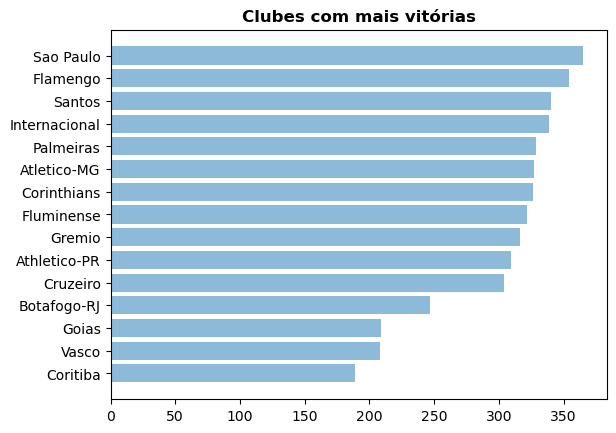

In [246]:
# Gráfico dos clubes com mais vitórias
mais_vitorias = mais_vitorias.sort_values().tail(15)
plt.barh(mais_vitorias.index, mais_vitorias.values, alpha=0.5)
plt.title("Clubes com mais vitórias", weight='bold')
plt.show()

In [247]:
# Verificando clubes que mais perderam no campeonato
mais_derrotas = dados_times['derrotas'].sort_values(ascending=False)
mais_derrotas.head(10)

time
Fluminense       283
Athletico-PR     282
Santos           261
Botafogo-RJ      259
Atletico-MG      253
Coritiba         250
Flamengo         243
Goias            239
Internacional    239
Gremio           237
Name: derrotas, dtype: int64

In [248]:
# Verificando clubes que mais empataram no campeonato
mais_empates = dados_times['empates'].sort_values(ascending=False)
mais_empates.head(10)

time
Sao Paulo        229
Corinthians      229
Flamengo         221
Santos           217
Fluminense       213
Internacional    202
Atletico-MG      199
Botafogo-RJ      190
Palmeiras        190
Athletico-PR     189
Name: empates, dtype: int64

In [257]:
# Verificando clubes com melhores aproveitamentos
melhores_aproveitamentos = dados_times['aproveitamento'].sort_values(ascending=False)
melhores_aproveitamentos.head(10)

time
Sao Paulo        53.95
Palmeiras        53.45
Flamengo         52.28
Internacional    52.09
Corinthians      51.58
Gremio           51.17
Cruzeiro         50.99
Atletico-MG      50.49
Santos           50.41
Fluminense       48.04
Name: aproveitamento, dtype: float64

In [261]:
# Verificando clubes com piores aproveitamentos
melhores_aproveitamentos.tail(10)

time
Chapecoense        45.71
Cuiaba             45.03
Avai               44.36
Joinville          43.86
Atletico-GO        42.61
CSA                40.35
Brasiliense        39.68
Santa Cruz         39.47
Gremio Prudente    35.09
America-RN         15.79
Name: aproveitamento, dtype: float64

In [259]:
# Verificando aproveitamentos dos mandantes
melhores_aproveitamentos = dados_mandantes['aproveitamento'].sort_values(ascending=False)
melhores_aproveitamentos.head(10)

time
Gremio           66.76
Internacional    66.67
Sao Paulo        66.26
Athletico-PR     65.38
Palmeiras        64.94
Barueri          64.91
Santos           64.87
Corinthians      63.42
Flamengo         63.40
Atletico-MG      62.99
Name: aproveitamento, dtype: float64

In [263]:
# Verificando aproveitamentos dos visitantes
melhores_aproveitamentos = dados_visitantes['aproveitamento'].sort_values(ascending=False)
melhores_aproveitamentos.head(10)

time
Palmeiras        41.96
Sao Paulo        41.65
Flamengo         41.22
Cruzeiro         40.34
Corinthians      39.74
Atletico-MG      37.96
Internacional    37.52
Fluminense       36.92
Bragantino       36.40
Cuiaba           36.26
Name: aproveitamento, dtype: float64

In [264]:
# Verificando piores aproveitamentos como mandante
melhores_aproveitamentos = dados_mandantes['aproveitamento'].sort_values(ascending=False)
melhores_aproveitamentos.tail(10)

time
Chapecoense        45.71
Cuiaba             45.03
Avai               44.36
Joinville          43.86
Atletico-GO        42.61
CSA                40.35
Brasiliense        39.68
Santa Cruz         39.47
Gremio Prudente    35.09
America-RN         15.79
Name: aproveitamento, dtype: float64